<a href="https://colab.research.google.com/github/pkarw-25/Task1_list_set_dictionary/blob/main/Task_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded=files.upload()

Saving heart.csv to heart.csv


In [4]:
data=pd.read_csv("heart.csv")
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [5]:
data['age_bin'] = pd.cut(data['age'], bins=[0, 40, 55, 65, 100], labels=['young', 'middle_aged', 'senior', 'elderly'])
data['chol_bin'] = pd.cut(data['chol'], bins=[0, 200, 240, 300, 600], labels=['normal', 'borderline_high', 'high', 'very_high'])
data['age_thalach'] = data['age'] * data['thalach']
data['cp_exang'] = data['cp'] * data['exang']
print(data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target      age_bin         chol_bin  age_thalach  cp_exang  
0   2     3       0  middle_aged  borderline_high         8736         0  
1   0     3       0  middle_aged  borderline_high         8215         0  
2   0     3       0      elderly           normal         8750         0  
3   1     3       0       senior  borderline_high         9821         0  
4   3     2       0       senior             high         6572         0  


# **PCA**

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['age_bin', 'chol_bin']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le


In [7]:
X = data.drop(columns='target')
y = data['target']


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


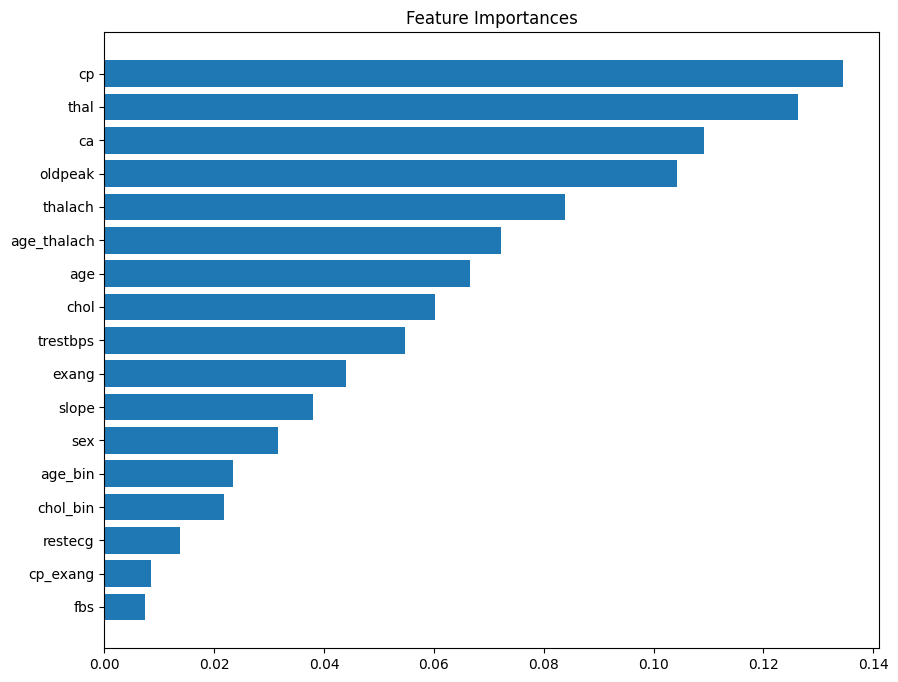

In [9]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)
feature_importances = rf.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title('Feature Importances')
plt.show()


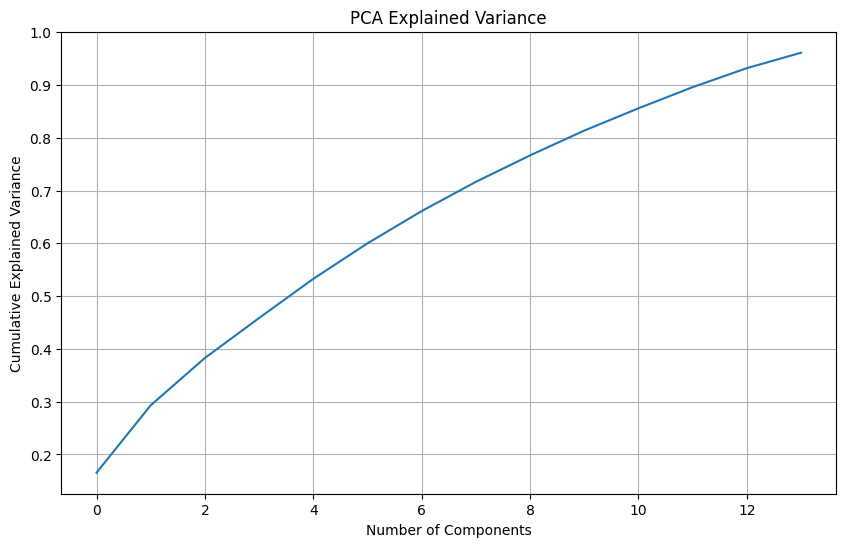

Number of components selected: 14


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()
n_components = X_pca.shape[1]
print(f"Number of components selected: {n_components}")


In [13]:
data['age_bin'] = pd.cut(data['age'], bins=[0, 40, 55, 65, 100], labels=['young', 'middle_aged', 'senior', 'elderly'])
data['chol_bin'] = pd.cut(data['chol'], bins=[0, 200, 240, 300, 600], labels=['normal', 'borderline_high', 'high', 'very_high'])
data['age_thalach'] = data['age'] * data['thalach']
data['cp_exang'] = data['cp'] * data['exang']

# Encode categorical variables
label_encoders = {}
for column in ['age_bin', 'chol_bin']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

# Separate features and target
X = data.drop(columns='target')
y = data['target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [15]:
from sklearn.model_selection import train_test_split # Import the missing function

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV # Import GridSearchCV

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Define GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
